In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

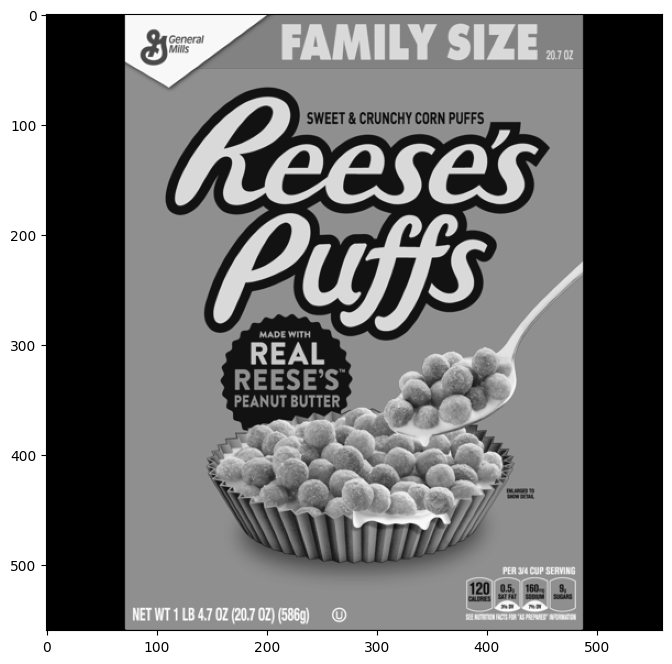

In [5]:
reeses = cv2.imread('./DATA/reeses_puffs.png', 0)
display(reeses)


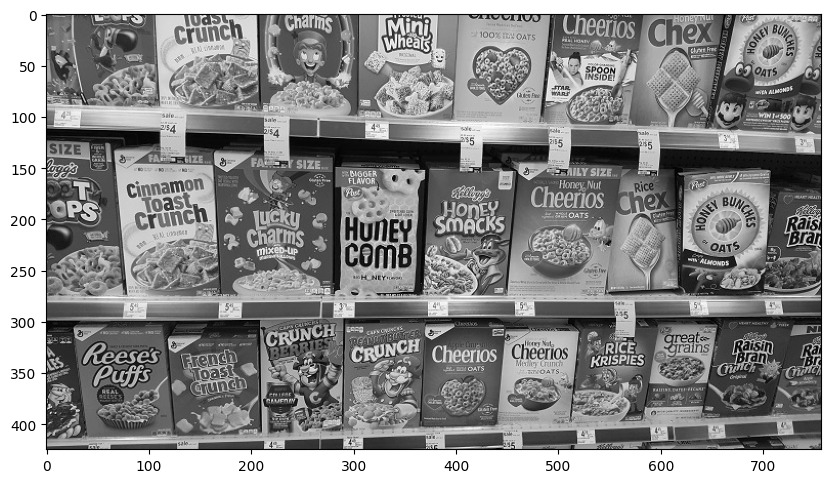

In [6]:
cereals = cv2.imread('./DATA/many_cereals.jpg',0)
display(cereals)

In [8]:
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(reeses, None)
kp2, des2 = orb.detectAndCompute(cereals, None)

In [9]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [10]:
matches = bf.match(des1, des2)

In [11]:
matches = sorted(matches, key=lambda x:x.distance)

In [14]:
reeses_matches = cv2.drawMatches(reeses, kp1, cereals, kp2, matches[:25], None, flags=2)

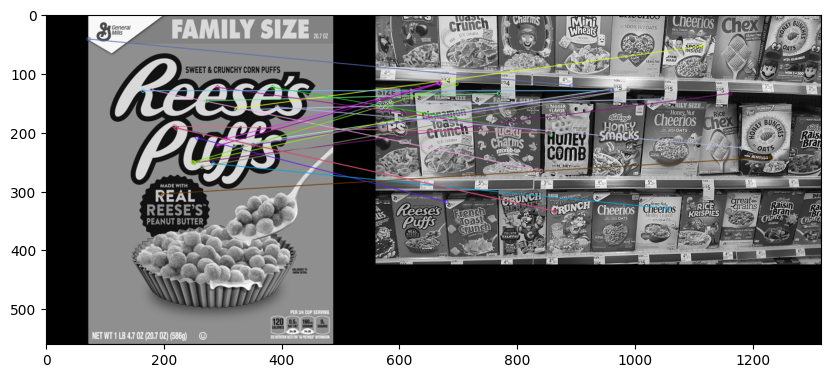

In [15]:
display(reeses_matches)

## SIFT Descriptors

In [19]:
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [20]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

In [23]:
goodMatches = []
for match1, match2 in matches:
    if match1.distance < 0.75*match2.distance:
        goodMatches.append([match1])

In [27]:
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, goodMatches, None, flags=2)

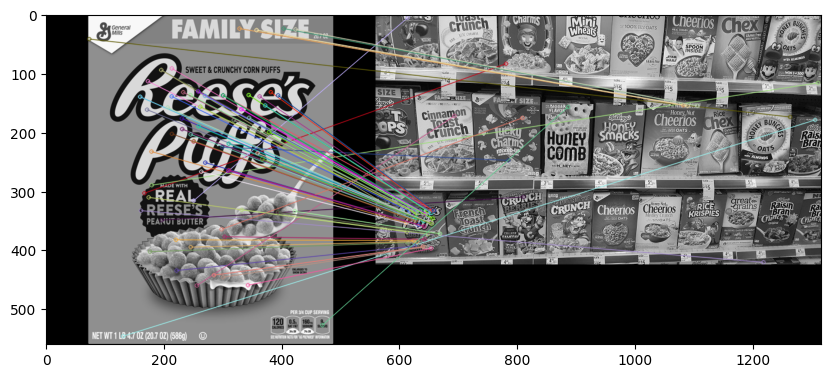

In [28]:
display(sift_matches)

## FLANN based matched
Fast library for approximate nearest neighbours

In [31]:
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [32]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

In [33]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [40]:
matches = flann.knnMatch(des1, des2, k=2)

In [41]:
matchesMask = [[0,0] for i in range(len(matches))]

In [43]:
for i, (match1, match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i] = [1,0]

In [44]:
draw_params = dict(matchColor=(0, 255, 0),
                  singlePointColor=(255,0,0),
                  matchesMask=matchesMask,
                  flags=0)

In [47]:
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **draw_params)

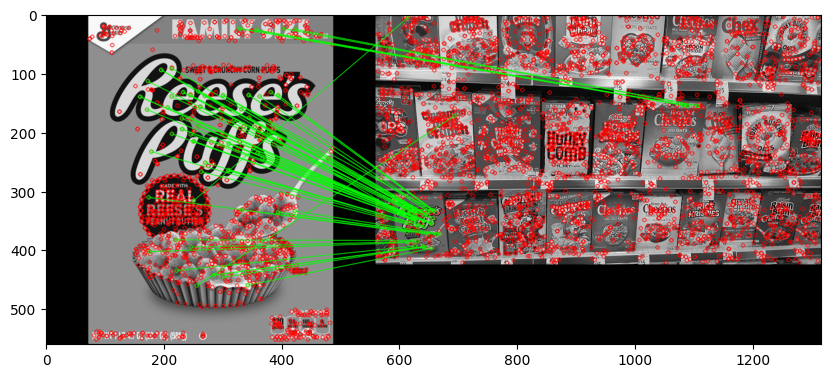

In [48]:
display(flann_matches)